In [404]:
import scipy.io.wavfile
from scipy import signal
from scipy import fftpack
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
from sklearn.decomposition import FastICA, PCA

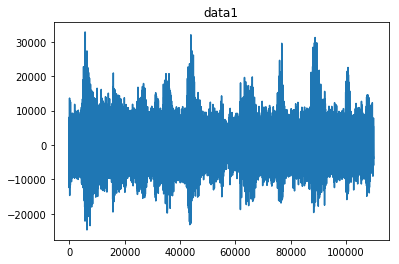

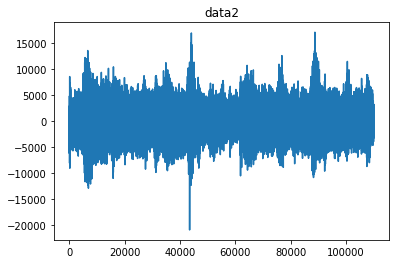

110000
[-6939]


In [405]:
sourceFilesPrefix="AudioSources\\music-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
plt.figure(1)
plt.plot(sample1_data)
plt.title("data1")
plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
plt.figure(2)
plt.plot(sample2_data)
plt.title("data2")
plt.show()

print (sample1_data.size)

def autocorrelation (x) :
    """
    Compute the autocorrelation of the signal, based on the properties of the
    power spectral density of the signal.
    """
    xp = x-np.mean(x)
    f = np.fft.fft(xp)
    p = np.array([np.real(v)**2+np.imag(v)**2 for v in f])
    pi = np.fft.ifft(p)
    return np.real(pi)[:x.size//2]/np.sum(xp**2)
lagDiff=np.correlate(sample1_data,sample2_data,mode='valid')
print(lagDiff)

In [406]:
Audio(sample1_data, rate=rate1)

In [407]:
Audio(sample2_data, rate=rate1)

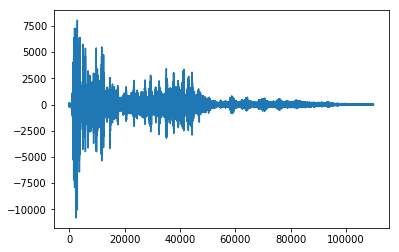

In [408]:
sample1_data=sample1_data/sample1_data.std(axis=0)
d1=fftpack.dct(sample1_data)
plt.figure()
plt.plot(d1)
plt.show()

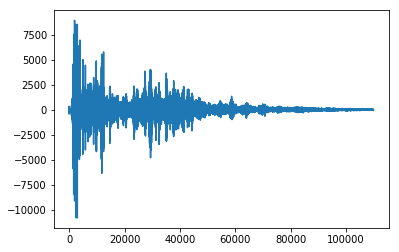

In [409]:
sample2_data=sample2_data/sample2_data.std(axis=0)
d2=fftpack.dct(sample2_data)
plt.figure()
plt.plot(d2)
plt.show()

In [410]:
Audio(d1,rate=rate1)

In [411]:
Audio(d2,rate=rate1)

In [412]:
timeDiff=lagDiff/rate1
print(timeDiff)
x=abs(int(lagDiff))
print(len(sample1_data))
d1=sample1_data[x:]
print(len(d1))
d2=sample2_data[:-x]
print(len(d2))

S=np.c_[d1,d2]
#S /= S.std(axis=0)
ica = FastICA(n_components=2)
S_=ica.fit_transform(S)
A_=ica.mixing_
M_=ica.mean_

[-0.4336875]
110000
103061
103061


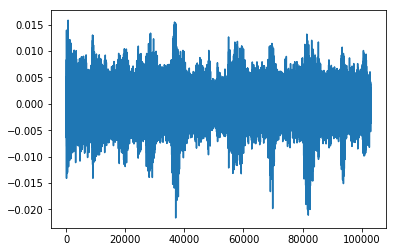

In [413]:
r1=fftpack.idct(S_.T[0])
plt.figure()
plt.plot(S_.T[0])
plt.show()
Audio(S_.T[0],rate=rate1)

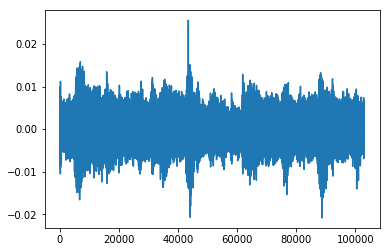

In [414]:
r2=fftpack.idct(S_.T[1])
plt.figure()
plt.plot(S_.T[1])
plt.show()
Audio(S_.T[1],rate=rate1)